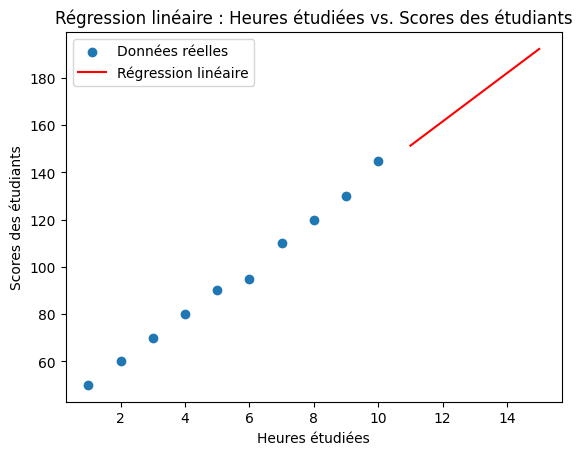

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Créez un jeu de données fictif (heures étudiées vs. scores des étudiants)
heures_etudiees = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores_etudiants = np.array([50, 60, 70, 80, 90, 95, 110, 120, 130, 145])

# Créez un modèle de régression linéaire
modele_regression = LinearRegression()

# Ajustez le modèle aux données
modele_regression.fit(heures_etudiees.reshape(-1, 1), scores_etudiants)

# Faites des prédictions avec le modèle
heures_etudiees_predites = np.array([11, 12, 13, 14, 15]).reshape(-1, 1)
scores_predits = modele_regression.predict(heures_etudiees_predites)

# Tracez les données d'origine
plt.scatter(heures_etudiees, scores_etudiants, label='Données réelles')

# Tracez les prédictions du modèle
plt.plot(heures_etudiees_predites, scores_predits, label='Régression linéaire', color='red')

plt.xlabel('Heures étudiées')
plt.ylabel('Scores des étudiants')
plt.title('Régression linéaire : Heures étudiées vs. Scores des étudiants')
plt.legend()
plt.show()


Do a linear regression on the dc curcve, plot the result and log an error score.

In [38]:
import pandas as pd

df = pd.read_csv('reduced_covid_sexe.csv')

df.head(15)

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
0,sexe,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
5,2020-03-21,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0
6,2020-03-22,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,2117.0,1031.0,1040.0,632.0,356.0,263.0
7,2020-03-23,8673.0,4882.0,3532.0,2080.0,1465.0,569.0,2567.0,1270.0,1247.0,860.0,497.0,350.0
8,2020-03-24,10163.0,5843.0,4149.0,2503.0,1773.0,694.0,3281.0,1609.0,1624.0,1100.0,661.0,425.0
9,2020-03-25,12072.0,7064.0,4856.0,2935.0,2127.0,785.0,4085.0,2000.0,2028.0,1388.0,818.0,557.0


In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('reduced_covid_sexe.csv')
data = df.iloc[2:]

# Extraire la colonne des hospitalisations
hosp = data['hosp']

# Faire la somme des valeurs de la colonne hosp
total_hosp = hosp.sum()

# Extraire les colonnes des réanimations pour homme et femme
rea_homme = data['rea.1']
rea_femme = data['rea.2']

# Faire la somme des valeurs des réanimations pour homme et femme
total_reaH = rea_homme.sum()
total_reaF = rea_femme.sum()



In [190]:
df = df.iloc[2:]
dates = pd.to_datetime(df['Unnamed: 0'])

#définir les quatres saisons 
def get_season(dates):
    year = str(dates.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='20/09/'+year),
               'autumn': pd.date_range(start='21/09/'+year, end='20/12/'+year)}
    if dates in seasons['spring']:
        return 'spring'
    if dates in seasons['summer']:
        return 'summer'
    if dates in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

#ajouter la colone season au dataframe
df['season'] = dates.map(get_season)


C:\Users\charl\AppData\Local\Temp\ipykernel_15620\2698344080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = dates.map(get_season)


In [189]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Créer un DataFrame avec les colonnes "jours" et "dc1"
X = df[['hosp', 'rea.1']]
y = df['season']
# Diviser le jeu de données en deux parties, l'une pour la formation (75%) et une autre pour la validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)
# Instancier un modèle d'arbres de décision
model = DecisionTreeRegressor()
# Entraîner le modèle sur les données de formation
model.fit(X_train, y_train)
# Faire des prédictions sur les données de validation
y_pred = model.predict(X_test)
# Calculer l'erreur absolue moyenne
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Calculer l'erreur quadratique moyenne
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Calculer la racine carrée de l'erreur quadratique moyenne
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Afficher les coefficients du modèle
print('Coefficients: \n', model.coef_)
# Afficher l'ordonnée à l'origine
print('Intercept: \n', model.intercept_)





ValueError: could not convert string to float: 'winter'

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('reduced_covid_sexe.csv')
data = df.iloc[2:]

# Extraire la colonne des hospitalisations
hosp = data['hosp']

# Faire la somme des valeurs de la colonne hosp
total_hosp = hosp.sum()

# Extraire les colonnes des réanimations pour homme et femme
rea_homme = data['rea.1']
rea_femme = data['rea.2']

# Faire la somme des valeurs des réanimations pour homme et femme
total_reaH = rea_homme.sum()
total_reaF = rea_femme.sum()

# Créer un tableau de jours correspondant aux indices des données
jours = np.arange(total_hosp).reshape(-1, 1)

# Utiliser les données de "jours" et "total_hosp" pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(jours, hosp, test_size=0.2, random_state=42)

# Instanciation du modèle d'arbre de décision
model_DT_hosp = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

# Entraînement du modèle sur les données d'entraînement pour les hospitalisations
model_DT_hosp.fit(X_train, y_train)

# Utiliser les données de "total_reaF" et "total_reaH" pour l'entraînement
X_train_rea, X_test_rea, y_train_rea, y_test_rea = train_test_split(rea_femme.values.reshape(-1, 1), total_reaH.values, test_size=0.2, random_state=42)

# Instanciation du modèle d'arbre de décision pour les réanimations
model_DT_rea = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

# Entraînement du modèle sur les données d'entraînement pour les réanimations
model_DT_rea.fit(X_train_rea, y_train_rea)

# Prédiction pour un exemple donné (longueur et largeur)
longueur = 2.5
largeur = 0.75

# Prédiction pour les hospitalisations
prediction_hosp = model_DT_hosp.predict([[longueur]])

# Prédiction pour les réanimations
prediction_rea = model_DT_rea.predict([[largeur]])

# Affichage des résultats
print("Prédiction des hospitalisations :", prediction_hosp)
print("Prédiction des réanimations :", prediction_rea)

# Calcul de la précision pour les réanimations
accuracy_rea = model_DT_rea.score(X_test_rea, y_test_rea)
print("Précision du modèle réanimations :", accuracy_rea)


ValueError: Found input variables with inconsistent numbers of samples: [19367212, 1109]

In [16]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
data = pd.read_csv("reduced_covid_sexe.csv")

data = data.iloc[2:]

# Définir les colonnes "dc" et "rea" en tant que variables
colonne_dc = data["dc"]


print("5 premières valeurs de la colonne 'dc' :")
print(colonne_dc.head())




5 premières valeurs de la colonne 'dc' :
2    218.0
3    327.0
4    450.0
5    525.0
6    632.0
Name: dc, dtype: float64


In [50]:
import pandas as pd

df = pd.read_csv('reduced_covid_sexe.csv')
dates = df[2:][	'Unnamed: 0']
dates = dates.apply(pd.to_datetime)



date_range =(dates.max() - dates.min())
n_jour = date_range.days +1

print("Nombre de jours entre le premier et le dernier cas: ", n_jour)
print("Premier cas: ", dates.min())
print("Dernier cas: ", dates.max())


Nombre de jours entre le premier et le dernier cas:  1109
Premier cas:  2020-03-18 00:00:00
Dernier cas:  2023-03-31 00:00:00


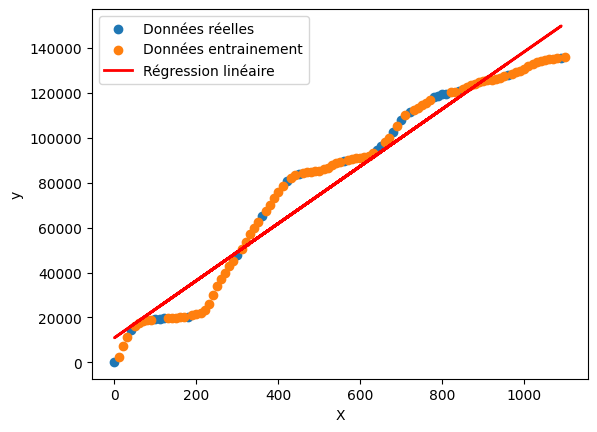

In [18]:
#ranger ces deux variable dans x et y
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Charger le fichier CSV dans un DataFrame
data = pd.read_csv("reduced_covid_sexe.csv")


#Supprimer le deux première ligne qui ne me servent pas car elles ne comporte pas de valeurs
data = data.iloc[2:]
pas = 10
X = np.arange(1, n_jour + 1, pas)
y=np.array(data['dc']) #variable connue ici les décès
y = y[::pas]


# Étape 2 : Divisez l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Étape 4 : Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train.reshape(-1,1), y_train)

#Prédisez les données sur l'ensemble de test
y_pred = model.predict(X_test.reshape(-1,1))

#visualiser les données sur l'ensemble de test
plt.scatter(X_test, y_test, label='Données réelles')
plt.scatter(X_train, y_train, label='Données entrainement')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Régression linéaire')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

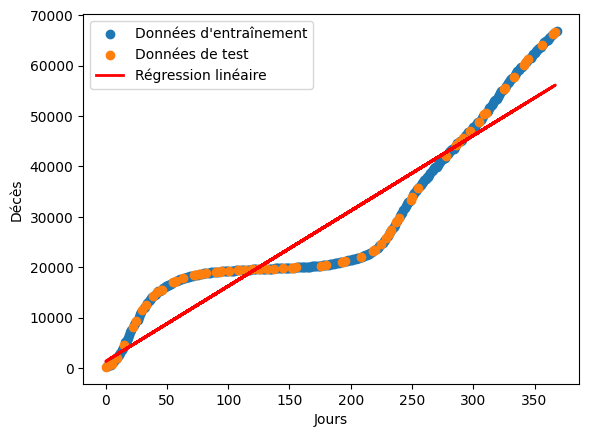

MSE du modèle : 38918861.17


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Charger le fichier CSV dans un DataFrame
data = pd.read_csv("reduced_covid_sexe.csv")

# Supprimer les deux premières lignes qui ne contiennent pas de données
data = data.iloc[2:]

# Sélectionner la colonne "dc" que vous souhaitez diviser
dc = data["dc"]

# Diviser la colonne "dc" en trois parties (par exemple)
T = len(dc) // 3
dc1 = dc.iloc[:T]
dc2 = dc.iloc[T:2*T]
dc3 = dc.iloc[2*T:]

# Créer un tableau de jours correspondant aux indices des données
jours = np.arange(len(dc1)).reshape(-1, 1)

# Utiliser les données de "jours" et "dc1" pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(jours, dc1, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les données sur l'ensemble de test
y_pred = model.predict(X_test)

# Visualiser les données d'entraînement et de test
plt.scatter(X_train, y_train, label='Données d\'entraînement')
plt.scatter(X_test, y_test, label='Données de test')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Régression linéaire')
plt.xlabel('Jours')
plt.ylabel('Décès')
plt.legend()
plt.show()

# Calculer le coefficient de détermination (R²) du modèle
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE du modèle : {mse:.2f}")


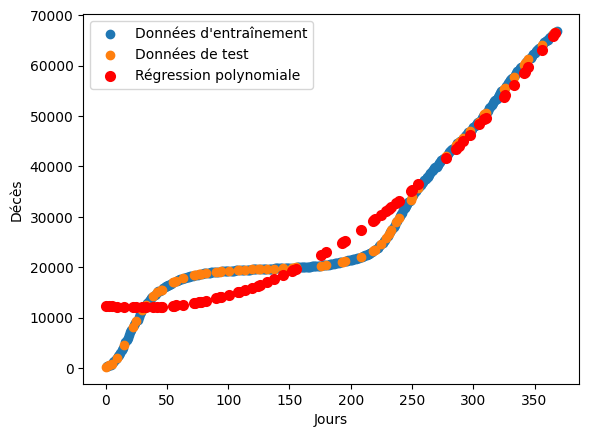

MSE du modèle : 19835577.99


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Charger le fichier CSV dans un DataFrame
data = pd.read_csv("reduced_covid_sexe.csv")

# Supprimer les deux premières lignes qui ne contiennent pas de données
data = data.iloc[2:]

# Sélectionner la colonne "dc" que vous souhaitez diviser
dc = data["dc"]

# Diviser la colonne "dc" en trois parties (par exemple)
T = len(dc) // 3
dc1 = dc.iloc[:T]
dc2 = dc.iloc[T:2*T]
dc3 = dc.iloc[2*T:]

# Créer un tableau de jours correspondant aux indices des données
jours = np.arange(len(dc1)).reshape(-1, 1)

# Utiliser les données de "jours" et "dc1" pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(jours, dc1, test_size=0.2, random_state=42)

# Créer un modele de regression polynomial et l'entrainer avec les valeur jours et dc1
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
# Afficher les résultats
plt.scatter(X_train, y_train, label='Données d\'entraînement')
plt.scatter(X_test, y_test, label='Données de test')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Régression polynomiale')
plt.xlabel('Jours')
plt.ylabel('Décès')
plt.legend()
plt.show()

#calculer le score "mean squared error" (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE du modèle : {mse:.2f}")

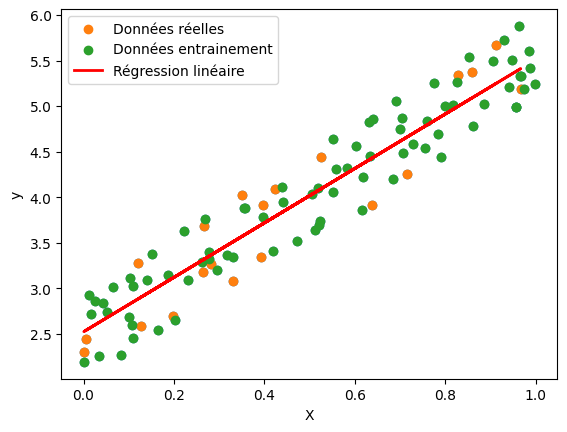

R² du modèle entrainé: 0.91


In [23]:
# Générer des données aléatoires 
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)
plt.scatter(X, y)


# Étape 2 : Divisez l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) # Entraine le modèle sur les données d'entrainement

y_pred = model.predict(X_test)
#visualiser les données sur l'ensemble de test
plt.scatter(X_test, y_test, label='Données réelles')
plt.scatter(X_train, y_train, label='Données entrainement')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Régression linéaire')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("R² du modèle entrainé: {:.2f}".format(model.score(X_train, y_train)))